# МЧА, осень 2019

## ИПР 6.  Метод конечных элементов для уравнения Пуассона.

*Примечание*. Материалы взяты из курса "Быстрые методы решения уравнений в частных производных", читавшегося группой научных вычислений в Сколковском институте науки и технологий весной 2015. Ниже приводится перевод на русский.

## МКЭ в одномерном случае:

* Рассмотрим область определения $\Omega = [0,1]$
* Сетка (результат триангуляции) ${\mathcal T}$ состоит из сегментов $[x_{i}, x_{i+1}]$ (где $x_0,...,x_N$ означают узлы)
<img src="fig/FEM_mesh_1D.png">

* Идея: материал состоит из базовых строительных блоков: треугольников, сегментов или тетраэдров.

* Возьмем кусочно линейные функции (точнее, кусочно аффинные) относительно $\mathcal T$:
$$
    u_h(x) = \sum_{i=1}^N c_i v_i(x)
$$
<img src="fig/FEM_basis_1D.png">

* Обозначим пространство функций как ${\mathcal P}^1(\mathcal T)$

* Зачастую будем использовать:
$$
\mathcal P^1_0(\mathcal T)
:=
\{u\in\mathcal P^1_0(\mathcal T) : u|_{\Omega} = 0 \}
$$

* Теперь мы можем перейти к дискретизации уравнения...

### Дискретизация уравнения (методом Галеркина):

Для начала нам надо переписать уравнение в вариационной форме.

#### Вариационная форма

* Рассмотрим уравнение Пуассона:
\\[
\begin{align*}
-\Delta u &= f
\\
u|_{\Gamma} &= 0
\end{align*}
\\]

* Умножим уравнение на функцию $v$ (называемую тестовой) такую, что $v|_{\Gamma}=0$ и проинтегрируем:
$$
-\int_{\Omega} (\Delta u) v
=- \int_{\Gamma} \nabla u v \cdot n + \int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$

* так как $v=0$ на границе, получаем
$$
\int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$
* Это уравнение называется **вариационной формой**

#### Случай граничных условий Неймана или смешанных граничных условий 

* Рассмотрим задачу
$$
\begin{align*}
-\Delta u &= f\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$
где $u_n$ - это производная по нормали $\Gamma_1 \cup\Gamma_2 = \partial\Omega$ (или нормальная производная).

* Необходимо ввести пространство функций $X = \{\text{функция }u : u|_{\Gamma_1}=0 \}$. Тогда для функции $v\in X$ имеем:
$$
-\int_{\Omega} \Delta u v
= - \int_{\Gamma_1} u_n v - \int_{\Gamma_2} u_n v + \int_{\Omega} \nabla u\cdot \nabla v
$$

* Магическим образом, первый интеграл =0 потому что $v=0$ на $\Gamma_1$ и второй интегра =0 потому что $u_n=0$ на $\Gamma_2$.

* **Получаем ту же вариационную задачу**, но с другим пространством функций

### Продолжим рассмотрения метода

* Обозначим $A(u,v) = \int_{\Omega} \nabla u\cdot\nabla v$ и $F(v) := \int_\Omega f v$.

* Получаем дискретные уравния:
\\[
A(u_h, v_h) = F(v_h)
\qquad \forall v_h\in \mathcal P^1_0(\mathcal T)
\\]
(И готово!)

* Чтобы имплементировать метод, нам нужно
$$
A(u_h, v_\ell) = F(v_\ell),
\qquad \ell=1,...,N-1
$$
(таким образом, в качестве тестовых функций достаточно использовать только базисные функции)

* Делаем подстановку $u_h = \sum_{k=1}^{N-1} c_k v_k$:
$$
\sum_{k=1}^{N-1} c_k A(v_k, v_\ell) = F(v_\ell) \qquad \ell=1,\ldots,N-1,
$$

* Следовательно, $A(v_k, v_\ell)$ есть элементы матрицы (называемую матрицей жесткости, **stiffness matrix**), и $F(v_\ell)$ есть компоненты вектора в правой части матричного уравнения.

* Таким образом, метод конечных элементов аналогичен методу Галеркина из ИРЛ 1.

* Остается только решить СЛАУ...

## МКЭ в 2D

* В двумерном случае сетка (или меш) состоит из треугольников
<img width="33%" src="fig/FEM_mesh_example.jpg">

    - Обычно, описывается 3 массивами:

    <tt>узлы:</tt> <br>
    $x_1$, $y_1$ <br>
    $x_2$, $y_2$ <br>
    ... <br>
    $x_N$, $y_N$ <br>
    (т.е., координаты первого узла $(x_1, y_1)$, и.т.д.)

    <tt>треугольники:</tt> <br>
    $n_1$, $n_2$, $n_3$ <br>
    $m_1$, $m_2$, $m_3$ <br>
    ... <br>
    (т.е., узлы $n_1$, $n_2$, $n_3$ являются вершинами первого треугольника, и.т.д.)

    <tt>грани:</tt> <br>
    $n_1$, $n_2$
    ... <br>
    (т.е., отрезок $n_1$, $n_2$ является первой гранью **границы области**, и.т.д. )

* Базисные функции имеют вид:

<img src="fig/FEM_basis_2D.png">  

### Сборка матрицы жесткости

Классический подход:

* Заметим, что $\nabla v_k$ является кусочно-линейной константой:
$$
A_{k,\ell}
= \int_{\Omega} \nabla v_k \nabla v_\ell
= \sum_{T\in\mathcal T} |T| (\nabla v_k|_T) (\nabla v_\ell|_T),
$$
где $|T|$ есть площадь (в общем случае, мера объема в n-мерном пространстве) $T$

* Тогда алгоритм имеет вид:
```
for k = 1 to n
  for l = 1 to n
    for all T
      if(k and l are nodes of T)
      // otherwise the integral is zero
        A(k,l) += |T|
           *(\nabla v_k|_T)
           *(\nabla v_l|_T)
```

* Обычно, циклы алгоритма меняют местами:
```
for all T
    for k, vertices of T
        for l, vertices of T
            A(k,l) += <<as before>>
```

* Преимущество: можно итерировать только по трем вершинам каждого треугольника
* Осталось только рассмотреть геометрию одного треугольника

<img src="fig/FEM_triangle.png">

* Имеем
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right)
$$
Пусть $n_1$, $n_2$, $n_3$ являются вершинами $T$. Обозначим $\eta_i := v_{n_i}$.
Легко показать:
$$
\nabla \eta _j = \frac{1}{2|T|}
\left(
\begin{array}{cc}
y _{j+1} - y _{j+2} \\
x _{j+2} - x _{j+1} \\
\end{array}
\right)
$$
Подразумевается, что $(x_4,y_4) = (x_1,y_1)$, $(x_5,y_5) = (x_2,y_2)$

* Можно показать, что оценкой матрицы $M_{j,k} = |T| (\nabla \eta_j)\cdot(\nabla \eta_k)$  является:
$$
M = \frac{|T|}{2} G G^T
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x _1 & x _2 & x _3 \\
y _1 & y _2 & y _3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right)
$$

* Тогда псевдокод может быть переписан:
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A(triangles(k),triangles(l)) += M(k,l)
```

* Больше деталей <a href="http://www2.mathematik.hu-berlin.de/~cc/cc_homepage/download/1999-AJ_CC_FS-50_Lines_of_Matlab.pdf">Remarks around 50 lines of Matlab: short finite element
implementation</a>

### Сборка правой части (силы)

* Чтобы оценить силы и избежать точного интегрирования:
$$
\int_T f \eta_i
$$
можно приблизить
$$
\int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i,
$$
где $(x_S,y_S)$ означает барицентр (или центр масс) треугольника.
Псевдокод для двумерного случая:
```
for all T
  calculate f(xS, yS)
  for k=1..3
    f(triangles(k)) += 1/3 * area(T) * f(xS, yS)
```

### Граничные условия

* Необходимо заполнить только "нужные" столбцы и строки матрицы жесткости, соответсвтующие "свободным узлам".

* **Свободные узлы** -- узлы не лежащие на границе $\Gamma_1$ для задачи
$$
\begin{align*}
-\Delta u &= 0\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$

* Тогда алгоритм имеем вид:
```
A = zero matrix for all nodes
for all T
    <<SAME>>
убрать столбцы и строки матрицы А, не соответствующие свободным узлам
```

* Алтернативно, можно **заменить** соответствующие строки и столбцы на:
$$
\begin{pmatrix}
\cdot & 0 & \cdot & \cdot \\
0 & 1 & 0 & 0\\
\cdot & 0 & \cdot & \cdot \\
\cdot & 0 & \cdot & \cdot \\
\end{pmatrix}
$$


## Преимущества/Недостатки метода конечных элементов

* Хорошо подходит для простой физики, сопромата.
* Хорошо соответствует принципам сохранения энергии, и другим косервативным принципам

Но...

* Не просто добиться стабильности для задач газо- и гидродинамики.
* иногда не монотонный.

# Задача
Рассмотрим уравнение Пуассона
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
где $\Omega = B_1(0,0)\setminus B_{0.3}(0.7,0)$, $B_r(x,y)$ есть круг радиуса $r$ с центром в $(x,y)$. Данное уравненение описывает распределение потока жидкости в трубе под давлением и является частью математической модели добычи нефти.

Задача: посчитать $\int_{\Omega} u$ используя метод конечных элементов.

Большинство генераторов сеток не смогу построить сетку на данной области, поэтому рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from meshpy import triangle
from scipy.sparse.lil import lil_matrix
from scipy.sparse.linalg import spsolve
from scipy.interpolate import griddata
from warnings import simplefilter

simplefilter('ignore')

## Шаг 1. Постройте сеть.

Можно сделать либо с помощью MeshPy, либо загрузив данные [файлы](https://github.com/oseledets/fastpde/tree/master/Mesh_guide).

Инструкция к MeshPy и функции, которые читают подготовленный файл сетки можно найти [тут](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/Mesh_guide/Mesh.ipynb).

In [2]:
def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]


def whole_circle_mesh(R, density=32, max_vol=6e-3):
    points = []
    facets = []

    points.extend((R * np.cos(angle), R * np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, density, endpoint=False))
    facets.extend(round_trip_connect(0, len(points) - 1))

    m_i = triangle.MeshInfo()
    m_i.set_points(points)
    m_i.set_facets(facets)

    mesh = triangle.build(m_i, max_volume=max_vol)
    mesh_points = np.array(mesh.points)
    mesh_triangles = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)

    return mesh_points, mesh_facets, mesh_triangles


def perforated_circle_mesh(R, r, offset, eps=0, R_density=32, r_density=32, max_vol=6e-3):
    points = [(r * np.cos(angle) + offset - eps, r * np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, r_density, endpoint=False)]
    facets = round_trip_connect(0, len(points) - 1)

    points.extend((R * np.cos(angle), R * np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, R_density, endpoint=False))
    facets.extend(round_trip_connect(r_density, len(points) - 1))

    m_i = triangle.MeshInfo()
    m_i.set_points(points)
    m_i.set_holes([(offset, 0)])
    m_i.set_facets(facets)

    mesh = triangle.build(m_i, max_volume=max_vol)
    mesh_points = np.array(mesh.points)
    mesh_triangles = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)

    return mesh_points, mesh_facets, mesh_triangles


def draw_mesh(x_list, y_list, triangles, width=8, height=8):
    plt.figure(figsize=(width, height))
    plt.triplot(x_list, y_list, triangles)
    plt.show()

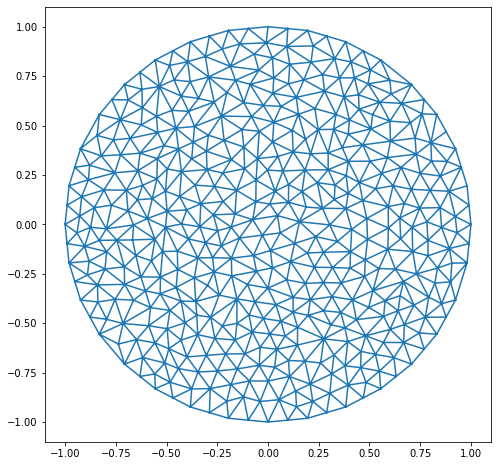

In [3]:
points, _, triangles = whole_circle_mesh(1)
draw_mesh(points[:, 0], points[:, 1], triangles)

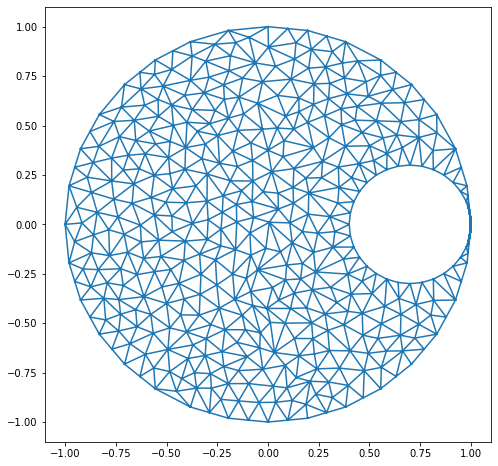

In [4]:
points, _, triangles = perforated_circle_mesh(1, 0.3, 0.6999)
draw_mesh(points[:, 0], points[:, 1], triangles)

## Шаг 2. Составьте матрицу жесткости
* Напишите функцию, которая составляет $3\times 3$ матрицу $M$ для заданного треугольника
$$M = \frac{|T|}{2} G G^T,
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right),
$$
и |T| - площадь треугольника:
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right),
$$
(подробнее [лекция 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb)).
* В цикле по всем треугольникам соберите матрицу жеcткости.
<!---
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A[triangles[k], triangles[l]] += M[k, l]
```
-->

* Поправьте строки и столбцы, соответствующие условию Дирихле

**Примечание:** используйте $\verb|scipy.sparse|$ для работы с разреженными матрицами. Обратите внимание, что lil - это единственный формат $\verb|scipy.sparse|$ который позволяет менять элементы разреженной матрицы после создания.

In [5]:
def get_area(p1, p2, p3):
    D = np.array([
        [p2[0] - p1[0], p2[1] - p1[1]],
        [p3[0] - p1[0], p3[1] - p1[1]]
    ])
    return np.linalg.det(D) / 2


def stiffness_matrix(points, facets, triangles):
    A = lil_matrix((len(points), len(points)))
    right_matrix = np.array([
        [0, 0],
        [1, 0],
        [0, 1]
    ])

    for t in triangles:
        p1 = points[t[0]]
        p2 = points[t[1]]
        p3 = points[t[2]]

        left_matrix = np.array([
            [1, 1, 1],
            [p1[0], p2[0], p3[0]],
            [p1[1], p2[1], p3[1]]
        ])

        T = get_area(p1, p2, p3)
        G = np.linalg.inv(left_matrix).dot(right_matrix)
        M = T * (G.dot(G.T)) #T/2

        for i in range(3):
            for j in range(3):
                A[t[i], t[j]] += M[i, j]

    for f in facets:
        A[:, f[0]] = 0
        A[f[0], :] = 0
        A[f[0], f[0]] = 1
    return A

## Шаг 3. Создайте правую часть уравнения

Правая часть уравнения для $i$-го узла сети: $$f_i = \int_\Omega f \eta_i d\Omega .$$
Чтобы собрать правую часть пройдите все узлы в цикле и посчитайте $$ \int_T f \eta_i.$$ Можно использовать апроксимацию $$ \int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i, $$ где $(x_S,y_S)$ обозначает центр масс треугольника. Подробнее см. [лекцию 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb). 

**Примечание:** не забудьте обнулить правую часть для узлов соответствующих условию Дирихле.

In [6]:
f = lambda x, y: 1


def get_vector(points, facets, triangles):
    V = np.zeros(len(points))

    for t in triangles:
        p1 = points[t[0]]
        p2 = points[t[1]]
        p3 = points[t[2]]
        T = np.abs(get_area(p1, p2, p3))
        f_val = f((p1[0]+p2[0]+p3[0])/3, (p1[1]+p2[1]+p3[1])/3)
        for i in range(3):
            V[t[i]] += f_val * T / 3

    for facet in facets:
        V[facet[0]] = 0
    return V

## Шаг 4. Проверьте свой код
Проверьте, что свое решения, зная, что на области $\Omega = B_1(0,0)$ решение уравнения
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
имеет вид 
$$
u = \frac{1-x^2 - y^2}{4}
$$
**Примечание:** Проилюстрировать решение можно используя следующий код
```
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
xi = np.linspace(-1, 1, 200) 
yi = np.linspace(-1, 1, 200) 
z = mlab.griddata(points[:, 0], points[:, 1], sol, xi, yi)
plt.contourf(xi, yi, z)
plt.colorbar()
```

In [7]:
def draw_solution(solution, mesh_points, density, title='', width=10, height=8, title_size=20):
    x_list = np.linspace(-1, 1, density)
    y_list = np.linspace(-1, 1, density)
    x, y = np.meshgrid(x_list, y_list)
    z = griddata((mesh_points[:, 0], mesh_points[:, 1]), solution, (x, y))
    plt.figure(figsize=(width, height))
    plt.contourf(x_list, y_list, z)
    plt.colorbar()
    plt.title(title, size = title_size)
    plt.show()

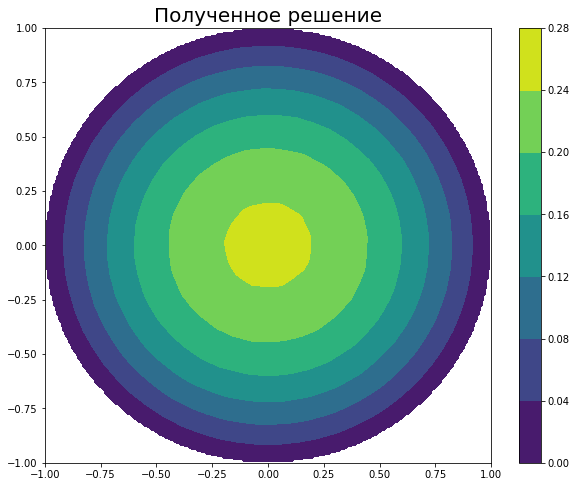

In [28]:
points, facets, triangles = whole_circle_mesh(1, density=64)
A = stiffness_matrix(points, facets, triangles)
vector = get_vector(points, facets, triangles)
my_solution = spsolve(A, vector)
draw_solution(my_solution, points, 300, 'Полученное решение')

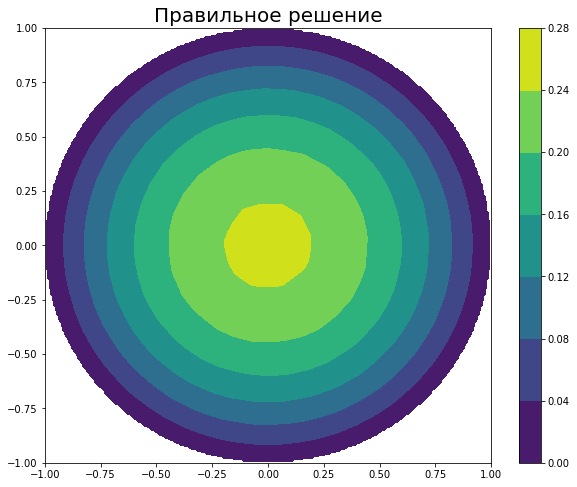

In [29]:
example_solution = (1 - points[:, 0]**2 - points[:, 1]**2)/4
draw_solution(example_solution, points, 300, 'Правильное решение')

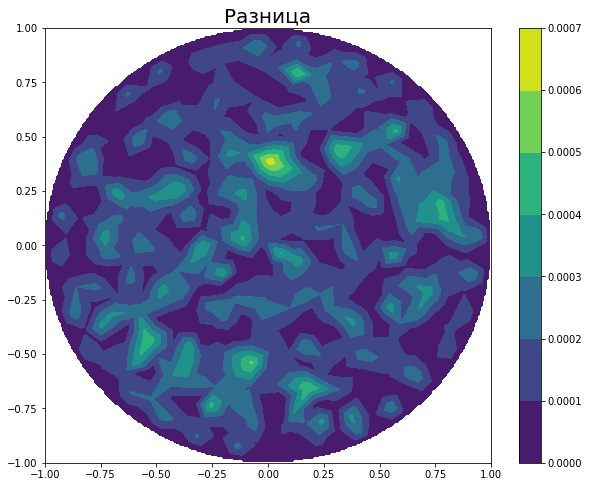

In [30]:
draw_solution(np.abs(my_solution - example_solution), points, 300, 'Разница')

## Шаг 5. Решите задачу для заданного региона.
Рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [10]:
def solution(R, r, offset, eps):
    points, facets, triangles = perforated_circle_mesh(R, r, offset, eps)
    A = stiffness_matrix(points, facets, triangles)
    vector = get_vector(points, facets, triangles)
    return  points, facets, triangles, spsolve(A, vector)

### Регион $\Omega_1$:

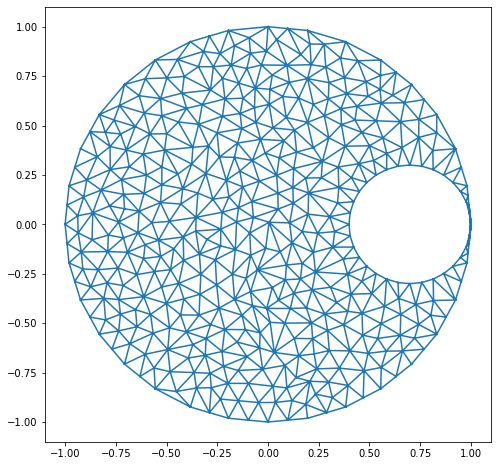

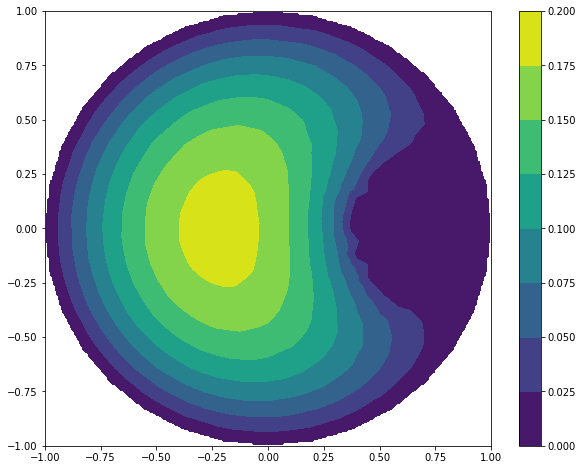

In [11]:
eps = 0.001
points_1, facets_1, triangles_1, solution_1 = solution(1, 0.3, 0.7, eps)
draw_mesh(points_1[:, 0], points_1[:, 1], triangles_1)
draw_solution(solution_1, points_1, 300)

### Регион $\Omega_2$:

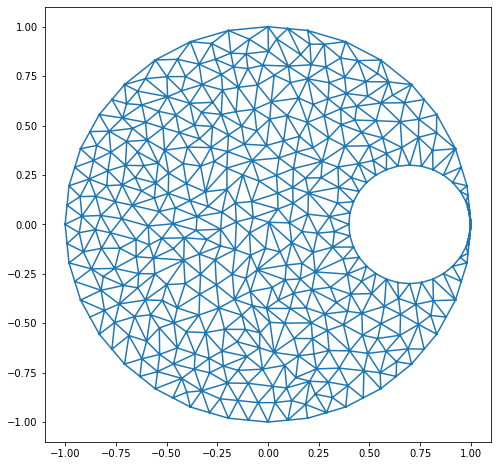

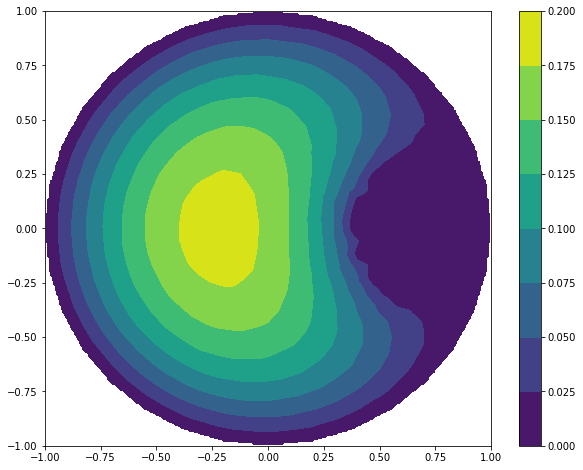

In [12]:
eps = 0.002
points_2, facets_2, triangles_2, solution_2 = solution(1, 0.3, 0.7, eps)
draw_mesh(points_2[:, 0], points_2[:, 1], triangles_2)
draw_solution(solution_2, points_2, 300)

## Шаг 6. Посчитайте поток жидкости
* Посчитайте поток жидкости для области $\int_{\Omega} u\, d \Omega$ in $B_1(0,0)\setminus B_{0.3}(0.7,0)$ и $B_1(0,0)\setminus B_{0.3}(0.5,0)$. Какой из них больше?

**Примечание:** $\int_{\Omega} u\, d \Omega$ не просто сумма всех элементов вектора решения, так как $u(x,y) \approx \sum с_i \eta_i(x,y)$.

In [15]:
def integration(points, triangles, solution):
    result = 0
    for t in triangles:
        p1 = points[t[0]]
        p2 = points[t[1]]
        p3 = points[t[2]]
        T = np.abs(get_area(p1, p2, p3))
        f_val = sum(solution[i] for i in t)
        result += T * f_val / 3
    return result

### Поток при смещении 0.7

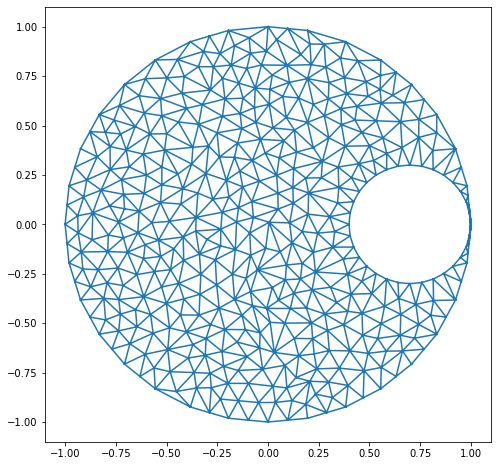

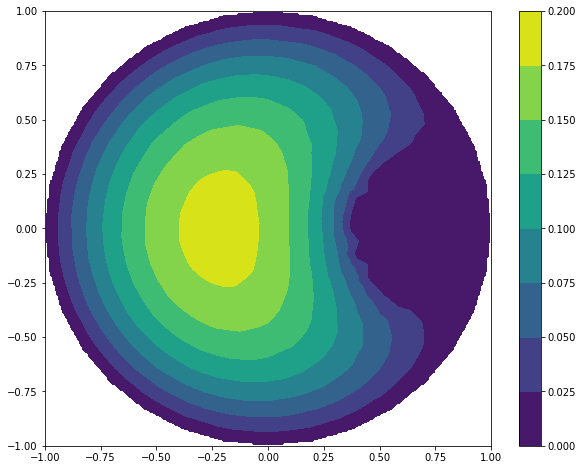

Поток при смещении 0.7 = 0.24666688451203317


In [18]:
points_1, facets_1, triangles_1, solution_1 = solution(1, 0.3, 0.7, 0.001)
draw_mesh(points_1[:, 0], points_1[:, 1], triangles_1)
draw_solution(solution_1, points_1, 300)
integral_1 = integration(points_1, triangles_1, solution_1)
print('Поток при смещении 0.7 = {0}'.format(integral_1))

### Поток при смещении 0.5

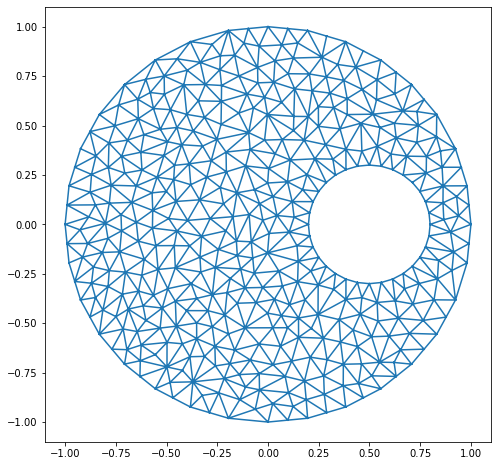

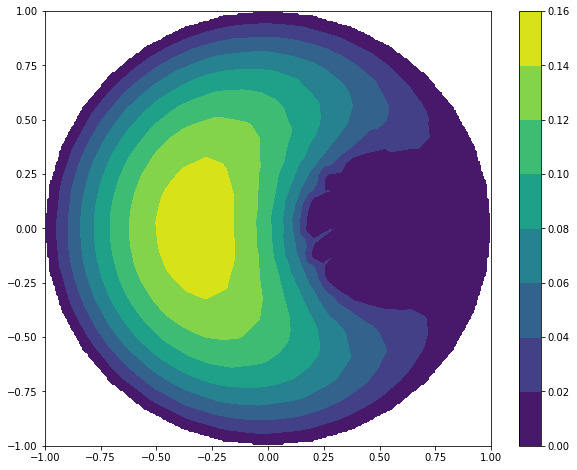

Поток при смещении 0.5 = 0.18974788577416138


In [19]:
points_2, facets_2, triangles_2, solution_2 = solution(1, 0.3, 0.5, 0.001)
draw_mesh(points_2[:, 0], points_2[:, 1], triangles_2)
draw_solution(solution_2, points_2, 300)
integral_2 = integration(points_2, triangles_2, solution_2)
print('Поток при смещении 0.5 = {0}'.format(integral_2))